## Seaborn

[Tutorial](https://elitedatascience.com/python-seaborn-tutorial)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [4]:
# Download file if it doesn't exist
! [ ! -f Pokemon.csv ] && wget https://elitedatascience.com/wp-content/uploads/2017/04/Pokemon.csv

In [5]:
df = pd.read_csv('Pokemon.csv', index_col=0, engine='python') # engine='python' because the file will not load otherwise

In [6]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


<Figure size 1152x432 with 0 Axes>

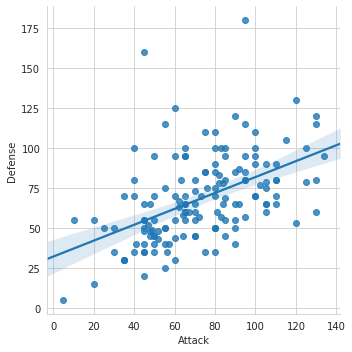

In [12]:
# Make the plots larger
plt.figure(figsize=(16, 6))
sns.lmplot(x='Attack', y='Defense', data=df)

<Figure size 1152x432 with 0 Axes>

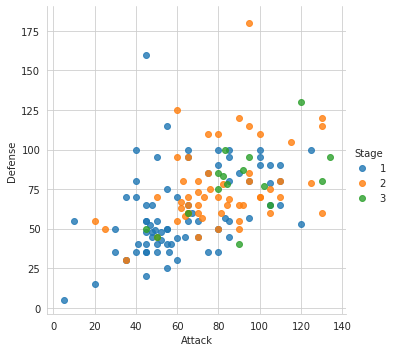

In [13]:
# Make the plots larger
plt.figure(figsize=(16, 6))
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')

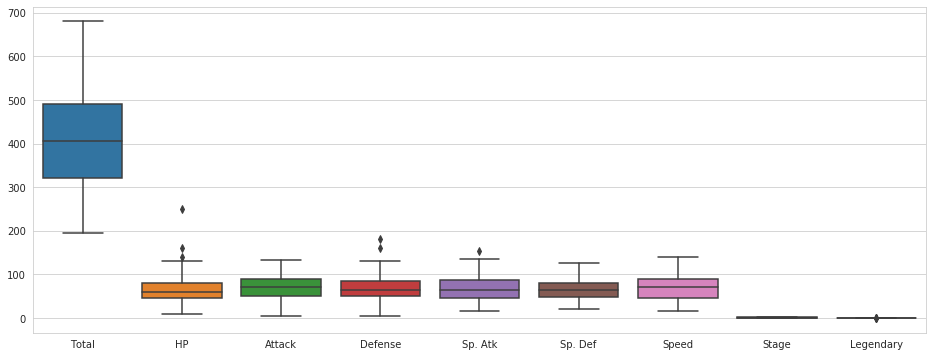

In [14]:
# Make the plots larger
plt.figure(figsize=(16, 6))
sns.boxplot(data=df)

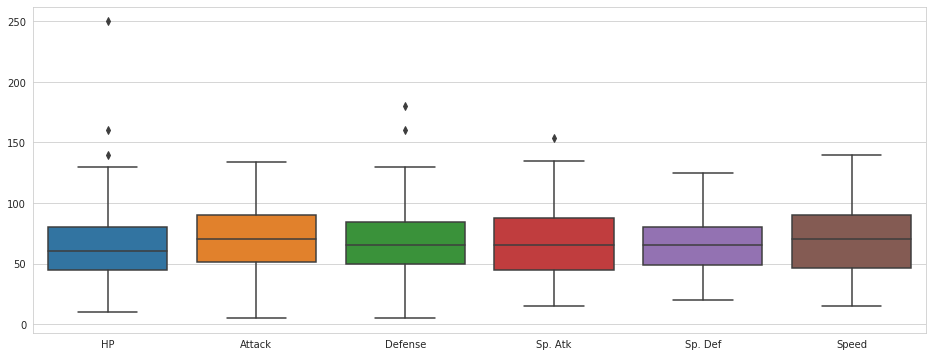

In [15]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

# New boxplot
# Make the plots larger
plt.figure(figsize=(16, 6))
sns.boxplot(data=stats_df)

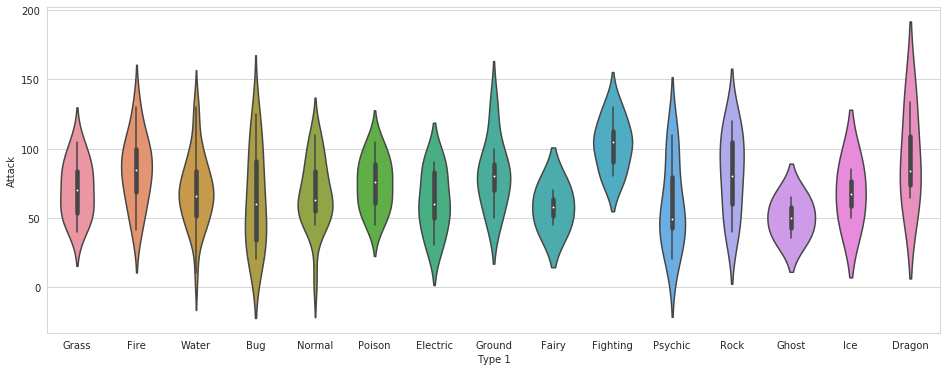

In [16]:
# set theme
sns.set_style('whitegrid')

# violin plot
# Make the plots larger
plt.figure(figsize=(16, 6))
sns.violinplot(x='Type 1', y='Attack', data=df)

In [18]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

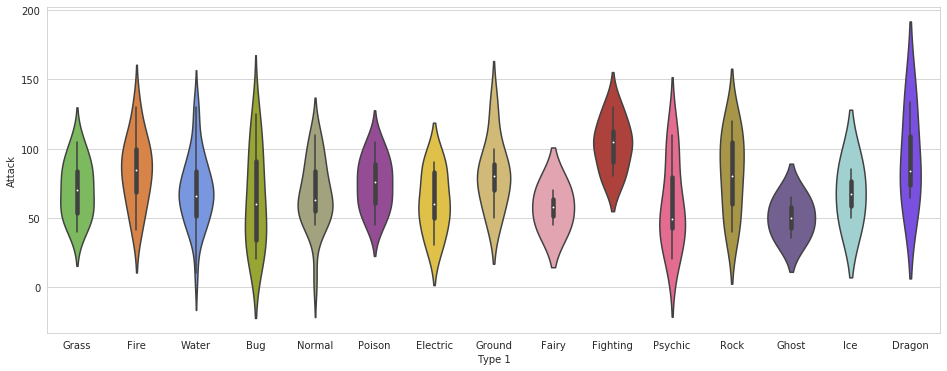

In [21]:
# use pokemon colours
plt.figure(figsize=(16, 6))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

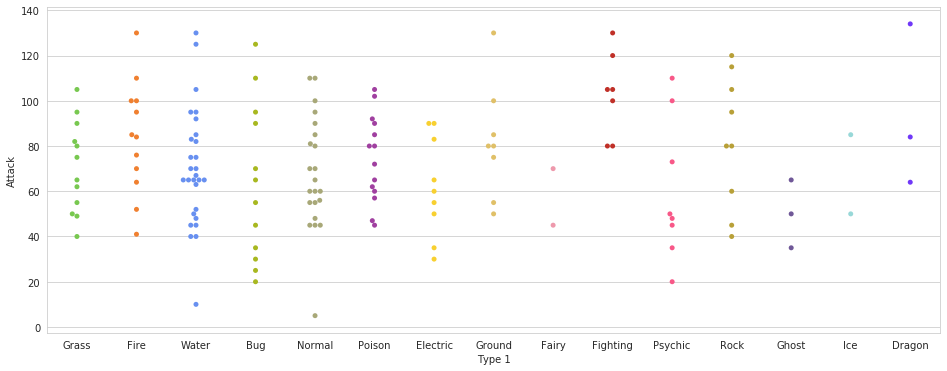

In [22]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

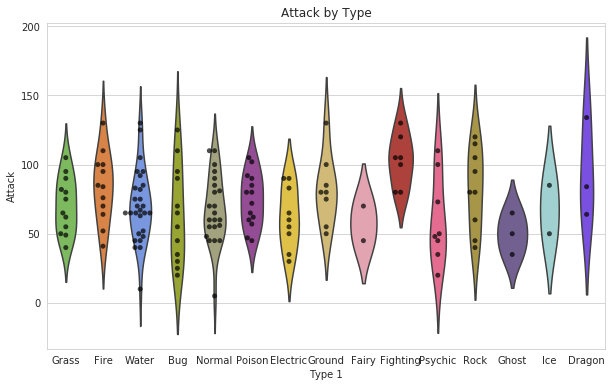

In [24]:
# Overlay plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors, inner=None) # remove the bars inside the violins
sns.swarmplot(x='Type 1', y='Attack', data=df, color='k', alpha=0.7)
plt.title('Attack by Type')

In [25]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [26]:
melted_df = pd.melt(stats_df, id_vars=['Name', 'Type 1', 'Type 2'], var_name="Stat")
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [27]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


In [28]:
melted_df[melted_df['Name'] == 'Bulbasaur']

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
151,Bulbasaur,Grass,Poison,Attack,49
302,Bulbasaur,Grass,Poison,Defense,49
453,Bulbasaur,Grass,Poison,Sp. Atk,65
604,Bulbasaur,Grass,Poison,Sp. Def,65
755,Bulbasaur,Grass,Poison,Speed,45


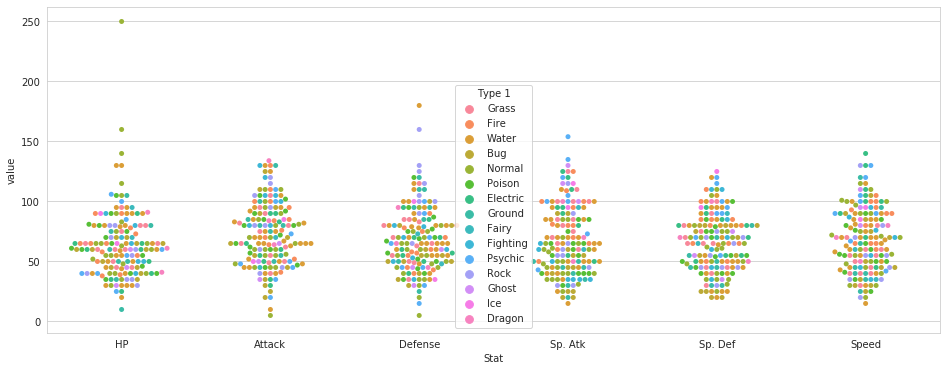

In [29]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')

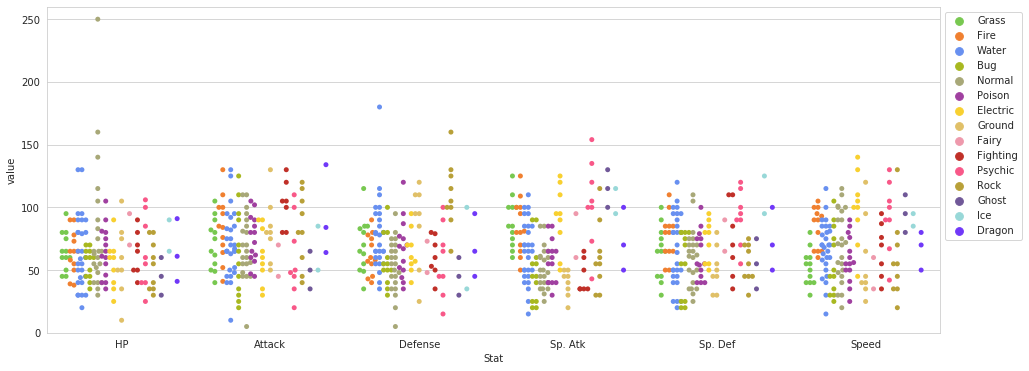

In [31]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Stat', y='value', 
              data=melted_df, 
              hue='Type 1',
              dodge=True, # Formerly split(); Separate points by hue 
              palette=pkmn_type_colors)

# Adjust y axis
plt.ylim(0, 260)

# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

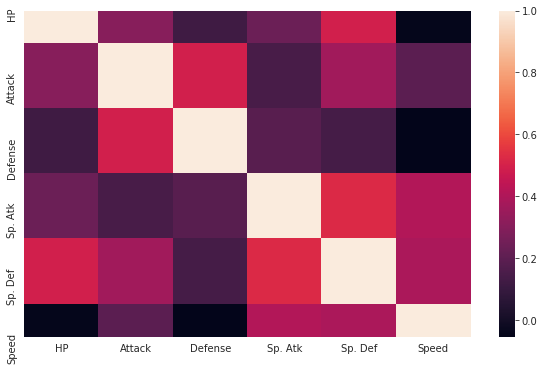

In [34]:
# Correlations
corr = stats_df.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr)

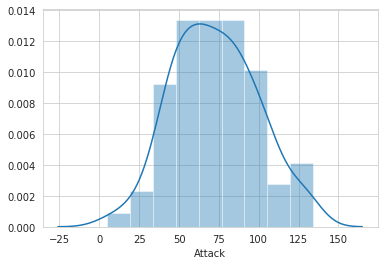

In [35]:
# Histogram, distribution
sns.distplot(df.Attack)

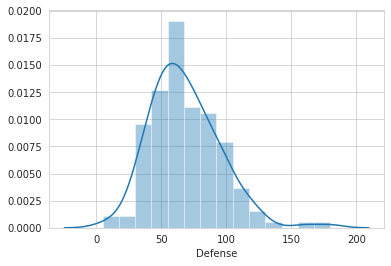

In [37]:
sns.distplot(df.Defense)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

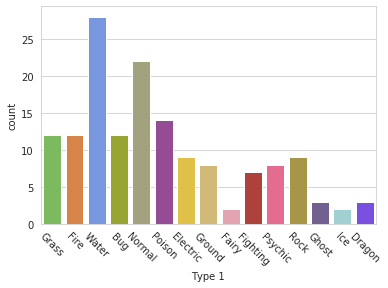

In [40]:
# Bar plot
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

# Rotate x-labels
plt.xticks(rotation=-45)

/mnt/encrypted_sdb1/home/aj/miniconda3/envs/ikapati/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


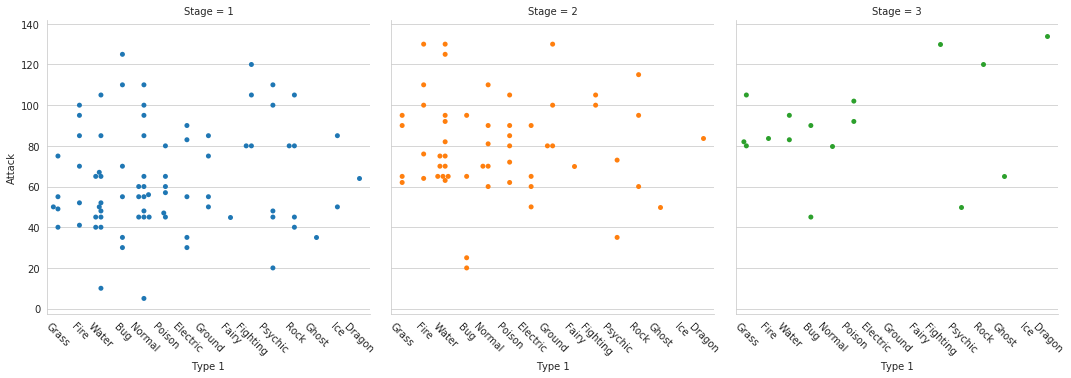

In [41]:
# Factor Plots to visualize separation by category classes
g = sns.factorplot(x='Type 1', y='Attack',
                   data=df,
                   hue='Stage', # Color by stage
                   col='Stage', # Separate by stage,
                   kind='swarm')

# Rotate x-axis labels
g.set_xticklabels(rotation=-45)



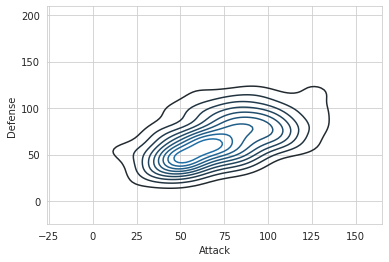

In [42]:
# Density Plot - distribution between 2 variables
sns.kdeplot(df.Attack, df.Defense)

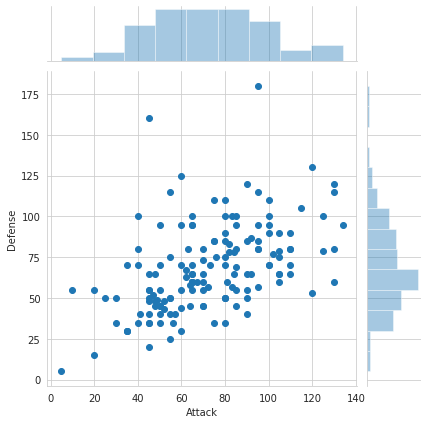

In [43]:
# Joint Distribution Plot - combine info from scatter plots and histograms to get info for bi-variate distribution
sns.jointplot(x='Attack', y='Defense', data=df)